### 목표
- 버섯의 특징을 활용해서 독/식용 버섯 구분
- Decision Tree 모델사용
- 인코딩
- 특징 선택

In [1]:
# 데이터 가져오기
import pandas as pd
import numpy as np

In [2]:
#/content/drive/MyDrive/폴리텍전남캠퍼스/data/mushrooms.csv
data = pd.read_csv('/content/drive/MyDrive/폴리텍전남캠퍼스/data/mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# 데이터의 크기
data.shape

(8124, 23)

In [8]:
# 문제 답지 나누기
# X(문제)
# y(답지)
# [행,열]
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [10]:
X.shape , y.shape

((8124, 22), (8124,))

In [11]:
# 원핫인코딩
X_one_hot = pd.get_dummies(X)
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [12]:
X_one_hot.shape , X.shape

((8124, 117), (8124, 22))

### 데이터 분할
- train,test 데이터 분할
- train_test_split을 사용하세요
- 비율은 7:3 나눠주세요
- X_train,X_test,y_train,y_test 이름으로

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_one_hot,y,
                                                 test_size=0.3,
                                                 random_state=42
                                                 )

In [15]:
X_one_hot.shape , X_train.shape, X_test.shape

((8124, 117), (5686, 117), (2438, 117))

In [16]:
y_train.shape, y_test.shape

((5686,), (2438,))

In [17]:
# 모델 생성
from sklearn.tree import DecisionTreeClassifier

In [18]:
# 모델 객체 생성
tree_model = DecisionTreeClassifier()

In [19]:
# 모델 학습
# tree_model.fit(train문제, train답지)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
# 모델 성능 평가
tree_model.score(X_test,y_test)

1.0

In [21]:
#  예측 , predict(새로운 문제 데이터)
pre = tree_model.predict(X_test)

In [30]:
pre

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [33]:
pre[:3]

array(['e', 'p', 'p'], dtype=object)

In [34]:
y_test

1971    e
6654    p
5606    p
3332    e
6988    p
       ..
462     e
1956    e
3781    p
799     e
2402    e
Name: class, Length: 2438, dtype: object

In [37]:
# 정확도 확인, accuracy_score(실제값,예측값)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,pre)
print('모델의 정확도', np.round(acc_score*100,3))

모델의 정확도 100.0


### Tree 구조 시각화

In [38]:
import graphviz

In [40]:
# 모델의 모양 출력파일(환경설정파일) 만들기
from sklearn.tree import export_graphviz

export_graphviz(tree_model,# 학습된 모델의 이름
                out_file = 'tree1.dot', #출력파일 이름 생성
                class_names = ['독버섯','식용버섯'], # 분류 답지 이름
                feature_names= X_one_hot.columns, # 특징의 이름
                impurity=  True, #불순도(gini)
                filled = True
)

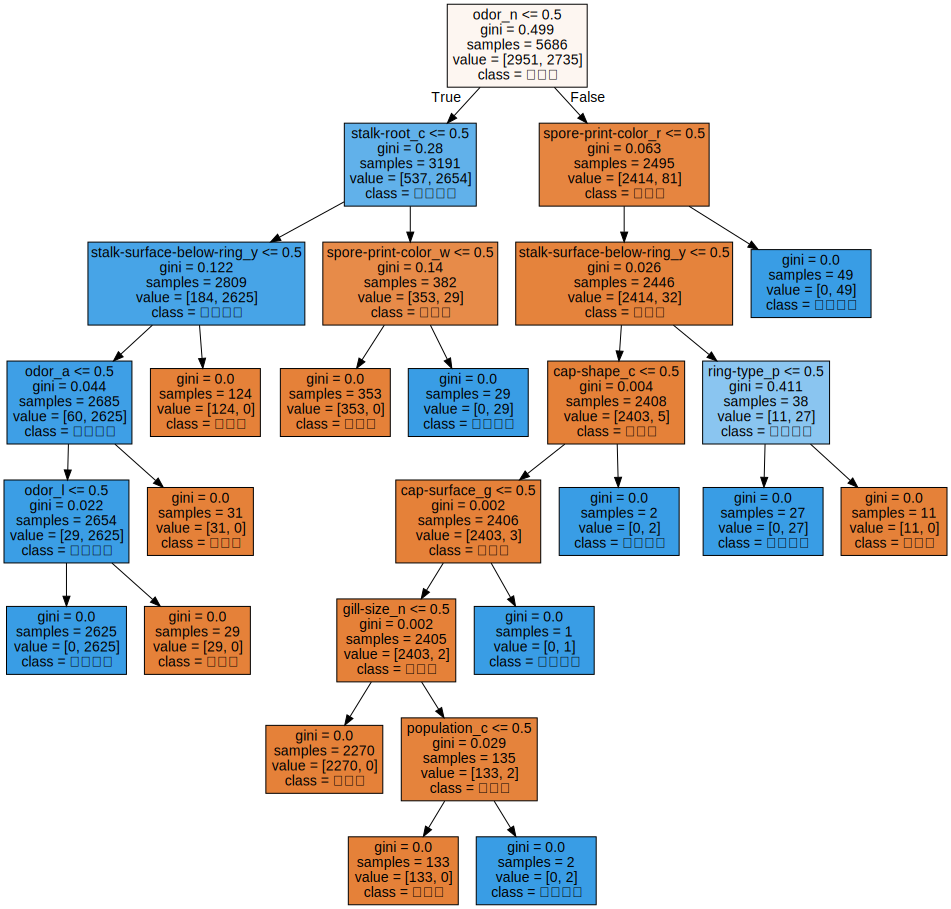

In [41]:
# 모델 출력
with open('/content/tree.dot', encoding='UTF8') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))